In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

# Stack Exchange Analysis and Prediction: Data Analysis and Machine Learning with Binary Logistic Regression and a Neural Net

### In this notebook, a look into the data generated by Stack Exchange reveals the most popular query subject as well as the busiest times for users to ask questions.  In addition, logistic regression and a neural net allow prediction of whether a post will be flagged or not.

### The Stack Exchange databases are queried using MySQL.  The data is then exported as a csv for analysis in Python related libraries and tools.  The predictive model is generated using Tensorflow.

##### Data schema information can be found here: https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede

#### Special thanks to Portland Data Science Meetup organizers and teammates for this project opportunity. 

#### Thanks to Stack Exchange for making their data available to the public.

### The first search: What subjects do Stack Exchange users inquire about the most?

#### The MySQL search performed:

SELECT top 20 ViewCount, Title, Body <br> 
FROM Posts <br>
WHERE CreationDate >= '2012-01-01' and CreationDate <= '2019-01-01' <br>
ORDER BY ViewCount desc

In [0]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
view_count = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/StackExchangeViewCount.csv')
view_count.head()

,ViewCount,Title,Body,Score
0,5485325,How do I find all files containing specific te...,<p>I'm trying to find a way to scan my entire ...,4367
1,3641401,How to use foreach with array in JavaScript?,<p>How can I loop through all the entries in a...,4131
2,3575288,"Why does my JavaScript get a ""No 'Access-Contr...",<p>I am trying to do authorization using <a hr...,2108
3,2949116,How do I vertically center text with CSS?,"<p>I have a div element which contains text, a...",2034
4,2583217,How to import an SQL file using the command li...,<p>I have a <code>.sql</code> file with an exp...,1567


### Displaying the full text of the top five queries.

In [7]:
pd.options.display.max_colwidth

50

In [8]:
one = view_count.iloc[0,1]
two = view_count.iloc[1,1]
three = view_count.iloc[2,1]
four = view_count.iloc[3,1]
five = view_count.iloc[4,1]
print(one)
print(two)
print(three)
print(four)
print(five)

How do I find all files containing specific text on Linux?
How to use foreach with array in JavaScript?
Why does my JavaScript get a "No 'Access-Control-Allow-Origin' header is present on the requested resource" error when Postman does not?
How do I vertically center text with CSS?
How to import an SQL file using the command line in MySQL?


### What are the most popular questions?

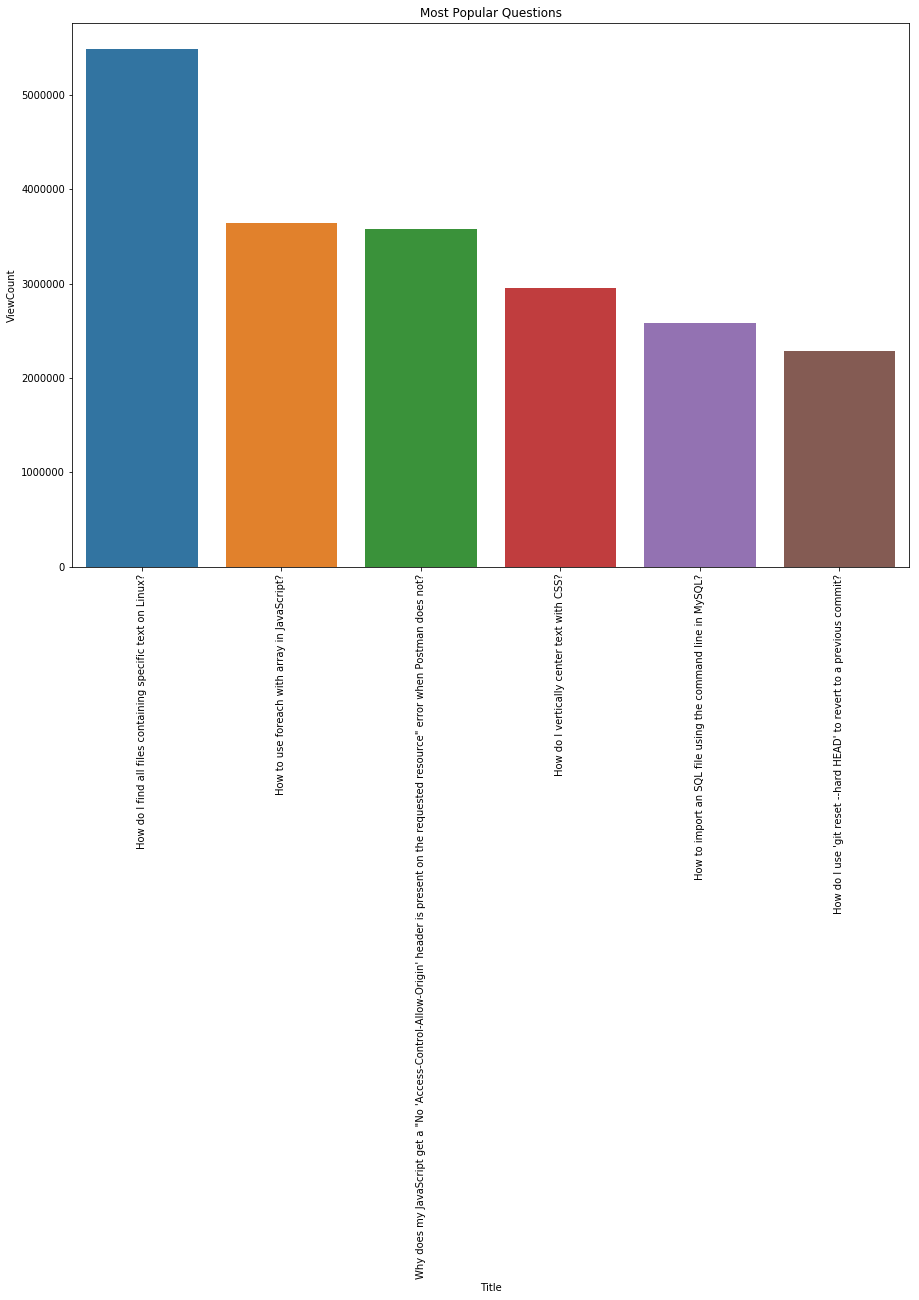

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
barplot = sns.barplot(x='Title', y='ViewCount', data=view_count[0:6])
barplot.set_title('Most Popular Questions')
for item in barplot.get_xticklabels():
    item.set_rotation(90)
    

### What time of year and what day of the week do people most frequently ask question on Stack Exchange?

#### The MySQL search performed:

SELECT top 500 ViewCount, CreationDate, Title, Body <br>
FROM Posts <br>
WHERE CreationDate >= '2012-01-01' <br>
ORDER BY ViewCount DESC <br>

In [11]:
date = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/StackExchangeByDate.csv')
date.head(10)

,ViewCount,CreationDate,Title,Body
0,5485325,2013-06-06 08:06:45,How do I find all files containing specific te...,<p>I'm trying to find a way to scan my entire ...
1,3641401,2012-02-17 13:51:48,How to use foreach with array in JavaScript?,<p>How can I loop through all the entries in a...
2,3575288,2013-11-17 19:29:06,"Why does my JavaScript get a ""No 'Access-Contr...",<p>I am trying to do authorization using <a hr...
3,2949116,2012-01-14 21:25:10,How do I vertically center text with CSS?,"<p>I have a div element which contains text, a..."
4,2583217,2013-07-16 00:43:48,How to import an SQL file using the command li...,<p>I have a <code>.sql</code> file with an exp...
5,2282269,2012-03-02 06:36:06,How do I use 'git reset --hard HEAD' to revert...,<p>I know that Git tracks changes I make to my...
6,2227666,2013-02-17 15:16:20,How do I copy folder with files to another fol...,<p>I am having some issues to copy a folder wi...
7,2205313,2013-08-07 03:02:46,"What does ""Could not find or load main class"" ...",<p>A common problem that new Java developers e...
8,2016481,2012-06-03 19:30:34,"Error message ""Forbidden You don't have permis...",<p>I have configured my Apache by myself and h...
9,1970987,2013-08-09 18:24:37,Center a column using Twitter Bootstrap 3,<p>How do I center a div of one column size wi...


In [0]:
date['CreationDate'] =  pd.to_datetime(date['CreationDate'])
#date.head()

In [13]:
# Checking that the datetime conversion works
date['CreationDate'].dtype

dtype('<M8[ns]')

In [0]:
# Creating "Year", "Month", and "WeekdayName" columns
date['Year'] = date['CreationDate'].dt.year
date['Month'] = date['CreationDate'].dt.month
date['WeekdayName'] = date['CreationDate'].dt.weekday_name
#date.head()

In [0]:
dates = date[['ViewCount','CreationDate','Year','Month','WeekdayName','Title','Body']]
#dates.head()

### What years have the most queries?

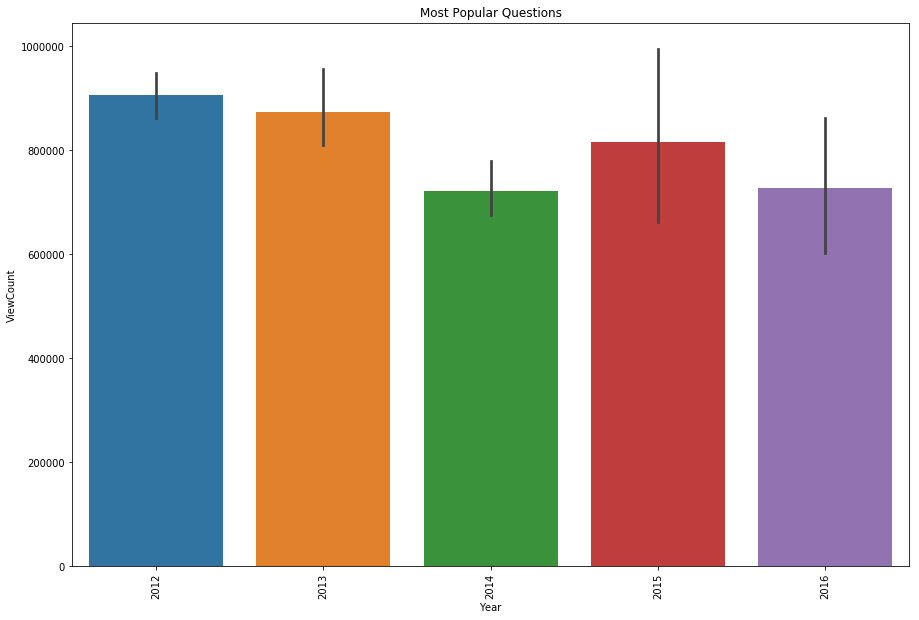

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
barplot = sns.barplot(x='Year', y='ViewCount', data=dates)
barplot.set_title('Most Popular Questions')
for item in barplot.get_xticklabels():
    item.set_rotation(90)

### What months have the most queries?

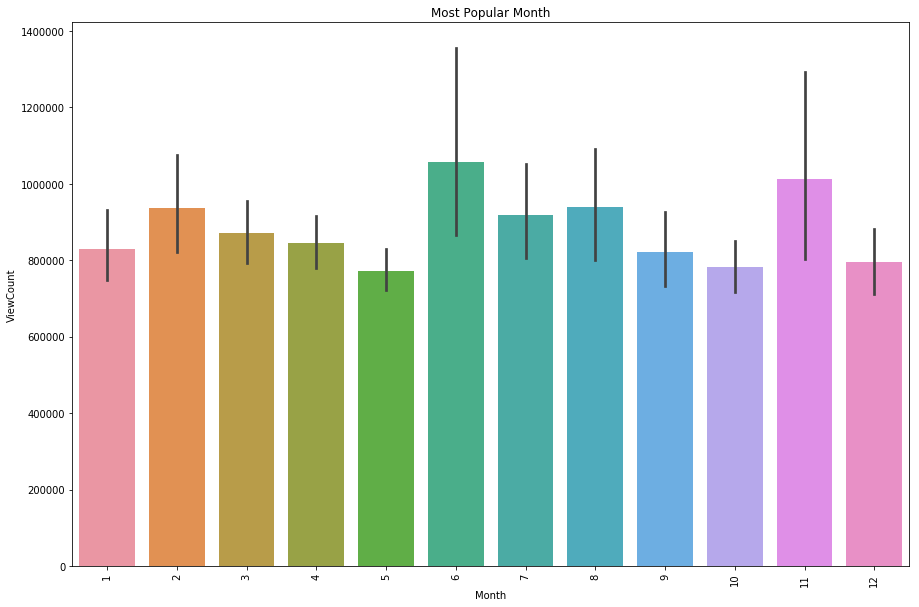

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
barplot = sns.barplot(x='Month', y='ViewCount', data=dates)
barplot.set_title('Most Popular Month')
for item in barplot.get_xticklabels():
    item.set_rotation(90)

### What days of the week have the most queries?

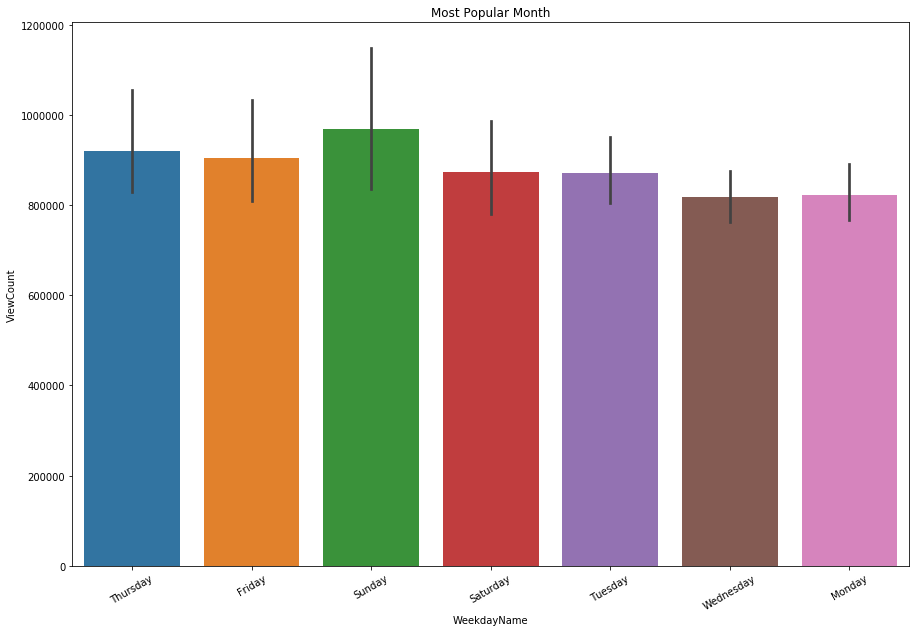

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
barplot = sns.barplot(x='WeekdayName', y='ViewCount', data=dates)
barplot.set_title('Most Popular Month')
for item in barplot.get_xticklabels():
    item.set_rotation(30)

# The Prediction Process: Predicting a Flagged Post

### Reading the Query Data.

In [4]:
# Read formatted date
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/2019_flagged_unflagged_data_7000_each.csv')
data.head()

,body,flag_id
0,<p>I want to read JT 3D file in c++. I am able...,1
1,<p>I had to solve a Capacitated Orienteering P...,1
2,<p>The SSLServerSocket below blocks in in.read...,1
3,<p>Graph seems to be returning invalid retry-a...,1
4,"<p>componentDidMount(){\n fetch('<a href=""h...",1


### Removing HTML Tags

In [0]:
from bs4 import BeautifulSoup
data['body'] = data.body.apply(lambda x: BeautifulSoup(str(x), "lxml").get_text())

In [6]:
data.head(2)

,body,flag_id
0,I want to read JT 3D file in c++. I am able to...,1
1,I had to solve a Capacitated Orienteering Prob...,1


### Reduce Sample Size for Text Processing and Prediction

In [7]:
reduced_data = data.sample(frac=.25)
reduced_data.shape

(3500, 2)

In [8]:
reduced_data.head(1)

,body,flag_id
2595,I am trying to extract a particular line of da...,1


In [9]:
reduced_data = reduced_data.reset_index(drop=True)
reduced_data.head(2)

,body,flag_id
0,I am trying to extract a particular line of da...,1
1,Using fresh install of Ubuntu 18.04. I have a ...,0


### Tokenizing the Queries

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# Tokenize queries
for query in reduced_data['body']:
  tokenized_word=word_tokenize(query)
  #print(tokenized_word)  

In [12]:
# Convert to list so tokenized queries can be passed back into the dataframe
list_of_tokenized = []
for query in reduced_data['body']:
  tokenized_word=word_tokenize(query)
  list_of_tokenized.append(tokenized_word)
print(list_of_tokenized[0:4])

[['I', 'am', 'trying', 'to', 'extract', 'a', 'particular', 'line', 'of', 'data', 'from', 'a', 'text', 'file', 'and', 'assign', 'that', 'data', 'to', 'a', 'variable', 'using', 'Batch', 'Script', '.', 'Example', 'of', 'data', 'in', 'text', 'file', ':', 'Line', '1', ':', 'This', 'is', 'a', 'test', '99', 'Line', '2', ':', 'This', 'can', 'be', 'a', 'test', '100', 'Line', '3', ':', 'Also', 'a', 'test', '42', 'Requirement', ':', 'How', 'do', 'I', 'use', 'the', 'grep', 'command', 'to', 'extract', 'Line', '1', 'and', 'all', 'its', 'contents', 'so', '``', 'Line', '1', ':', 'This', 'is', 'a', 'test', '99', "''", 'and', 'extract', 'Line', '3', 'and', 'its', 'contents', '``', 'Line', '3', ':', 'Also', 'a', 'test', '42', "''", '.', 'I', 'then', 'would', 'like', 'to', 'assign', 'the', 'outcome', 'to', 'a', 'combined', 'variable', 'so', 'I', 'can', 'use', 'it', 'later', 'on', '.'], ['Using', 'fresh', 'install', 'of', 'Ubuntu', '18.04', '.', 'I', 'have', 'a', 'database', 'from', 'Ubuntu', '16.04', 'on'

In [13]:
reduced_data['TokenBody'] = list_of_tokenized
reduced_data.head(2)

,body,flag_id,TokenBody
0,I am trying to extract a particular line of da...,1,"[I, am, trying, to, extract, a, particular, li..."
1,Using fresh install of Ubuntu 18.04. I have a ...,0,"[Using, fresh, install, of, Ubuntu, 18.04, ., ..."


### Preliminary look at term frequencies.

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 73 samples and 199 outcomes>


In [15]:
fdist.most_common(20)

[('the', 13),
 ("'", 13),
 (',', 10),
 ('I', 8),
 ('{', 8),
 ('}', 8),
 ('>', 8),
 ('calendar', 7),
 ('to', 6),
 (':', 5),
 ('Form', 4),
 ('(', 4),
 ('Deadline', 4),
 (')', 4),
 ('$', 4),
 ('rss-', 4),
 ('=', 4),
 ('have', 3),
 ('default', 3),
 ('value', 3)]

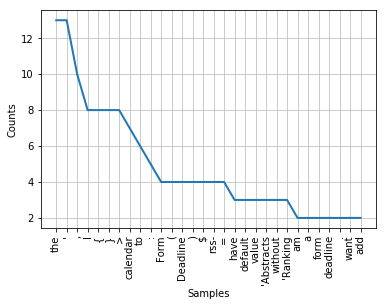

In [16]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Removing stopwords


In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"aren't", 'about', 'before', 'needn', 'until', 'too', "won't", 'further', 'any', "needn't", 'themselves', 'down', 'will', 'were', 'being', 'then', "didn't", 't', 'wouldn', 'they', 'couldn', 'all', 'should', 'on', 'out', "isn't", 'not', 'because', 'to', 'it', 'am', 'my', 'your', 'won', 'below', 'y', 'those', 'an', "you're", 'both', "doesn't", 'mustn', 'under', 'what', 'has', 'be', 'above', "that'll", 'itself', 're', 'himself', 'hadn', "shouldn't", 'he', 'these', 'into', 'few', 'but', 'same', 'only', "don't", 'her', 'just', 'nor', 'isn', 'mightn', 'its', "weren't", 'haven', 'after', 'how', "should've", 'ain', 'or', 'ourselves', 'of', 'd', 'if', 'own', 'there', 'other', "it's", 'herself', 'had', 'as', 'm', 'them', 'here', 'this', 'by', 'now', "haven't", 'you', 'for', 'did', 'their', 'who', 'a', 'off', 'didn', 'yourself', 'o', 'most', 'i', 'yours', 'me', 'don', "you'll", 

In [0]:
filtered_column=[]
for word_list in reduced_data['TokenBody']:
  filtered_query=[]
  for word in word_list:
    if word not in stop_words:
      filtered_query.append(word)
  filtered_column.append(filtered_query)

In [19]:
reduced_data["NoStopWords"] = filtered_column
reduced_data.head(1)

,body,flag_id,TokenBody,NoStopWords
0,I am trying to extract a particular line of da...,1,"[I, am, trying, to, extract, a, particular, li...","[I, trying, extract, particular, line, data, t..."


### Lemmatization

In [20]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
lemm_words = []
for query in reduced_data['NoStopWords']:
    lem_words = []
    for word in query:
      lem_word = lem.lemmatize(word)
      lem_words.append(lem_word)
    lemm_words.append(lem_words)  

In [22]:
reduced_data['LemmWords'] = lemm_words
reduced_data.head(1)

,body,flag_id,TokenBody,NoStopWords,LemmWords
0,I am trying to extract a particular line of da...,1,"[I, am, trying, to, extract, a, particular, li...","[I, trying, extract, particular, line, data, t...","[I, trying, extract, particular, line, data, t..."


### Parts of Speech Labeling

#### This process uses too much memory for this notebook framework.  The following code can be implemented for Parts of Speech Labeling.

In [0]:
#nltk.download('averaged_perceptron_tagger')


In [0]:
# POSS_words = []
# for query in reduced_data['TokenBody']:
#     POS_words = []
#     for word in query:
#       POS_word = nltk.pos_tag(query)
#       POS_words.append(POS_word)
#     POSS_words.append(POS_words) 

### Bag of Words Vectorization

In [0]:
# Converting the list of lists to a list of strings.
lemm_list = []
for query in lemm_words:
  query = ' '.join(query)
  lemm_list.append(query)

In [24]:
lemm_list[1]

"Using fresh install Ubuntu 18.04 . I database Ubuntu 16.04 separate drive drive I 've installed 18.04 . I 'm following suggestion answer 11 Moving MySQL InnoDB database separate drive I 've created symlink /var/lib pointing old /var/lib/mysql changed owner chown -h mysql : mysql lrwxrwxrwx 1 mysql mysql 32 Mar 1 22:30 mysql - > /media/mike/Ubuntu/var/lib/mysql As suggested Answer 11 , I tested link sudo -u mysql l /new/path/yourdatabase got permission denied As also suggested answer 11 , target mysql directory lower directory chmod a+x As suggested answer 11 I appealing help I move deal apparmor issue ."

In [25]:
# Adding stringform lemmatized words back into dataframe
reduced_data['LemmString'] = lemm_list
reduced_data.head(1)

,body,flag_id,TokenBody,NoStopWords,LemmWords,LemmString
0,I am trying to extract a particular line of da...,1,"[I, am, trying, to, extract, a, particular, li...","[I, trying, extract, particular, line, data, t...","[I, trying, extract, particular, line, data, t...",I trying extract particular line data text fil...


In [0]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
count_vec = CountVectorizer() #lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize


In [27]:
# Changing the list into a feature matrix
vec_lemms = count_vec.fit(lemm_list)
vec_lemms = count_vec.transform(lemm_list)
vec_lemms

<3500x33445 sparse matrix of type '<class 'numpy.int64'>'
	with 177603 stored elements in Compressed Sparse Row format>

###  TF-IDF Word Vectorization

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [29]:
tfidf_fit = tfidf.fit(lemm_list)
tfidf_transform = tfidf.transform(lemm_list)
tfidf_transform

<3500x33445 sparse matrix of type '<class 'numpy.float64'>'
	with 177603 stored elements in Compressed Sparse Row format>

In [30]:
vec_data = pd.DataFrame(tfidf_transform.toarray(), columns=tfidf.get_feature_names())
vec_data.head(1)

,00,000,0000,00000,000000,00000000,0000000000,000000000000,000000000046,00000000e,...,마지막,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
vec_data.shape

(3500, 33445)

In [33]:
prepared_data = pd.concat([reduced_data, vec_data], axis=1)
prepared_data.head(1)

,body,flag_id,TokenBody,NoStopWords,LemmWords,LemmString,00,000,0000,00000,...,마지막,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일
0,I am trying to extract a particular line of da...,1,"[I, am, trying, to, extract, a, particular, li...","[I, trying, extract, particular, line, data, t...","[I, trying, extract, particular, line, data, t...",I trying extract particular line data text fil...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
prepared_data.shape

(3500, 33451)

### Cluster Finding with KMeans

In [0]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans()
model.fit(vec_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
predict = model.predict(vec_data)

### Adding KMeans Clump Result as New Feature

In [39]:
prepared_data['ClumpFeature'] = pd.Series(predict, index=prepared_data.index)
prepared_data.head(1)

,body,flag_id,TokenBody,NoStopWords,LemmWords,LemmString,00,000,0000,00000,...,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일,ClumpFeature
0,I am trying to extract a particular line of da...,1,"[I, am, trying, to, extract, a, particular, li...","[I, trying, extract, particular, line, data, t...","[I, trying, extract, particular, line, data, t...",I trying extract particular line data text fil...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
# Checking to see there are 8 separate labels
prepared_data['ClumpFeature'].value_counts()

0    3491
7       3
5       1
3       1
1       1
6       1
4       1
2       1
Name: ClumpFeature, dtype: int64

### Final Data Preparation before Prediction

In [41]:
prepared_data = prepared_data.drop(['body','TokenBody','NoStopWords','LemmWords','LemmString'], axis=1)
prepared_data.head(1)

,flag_id,00,000,0000,00000,000000,00000000,0000000000,000000000000,000000000046,...,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일,ClumpFeature
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
columns = prepared_data.columns.tolist()
columns = columns[-1:] + columns[:-1]

In [43]:
# Moving ClumpFeature to the beginning of the dataframe
prepared_data = prepared_data[columns]
prepared_data.head(1)

,ClumpFeature,flag_id,00,000,0000,00000,000000,00000000,0000000000,000000000000,...,마지막,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일
0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using Binary Logistic Regression to Answer the Question ,  "Will this post be flagged?" - an Opportunity for Ensemble Learning

In [44]:
logistic_cols = prepared_data.loc[:, prepared_data.columns != 'flag_id']
logistic_cols.head(1)

,ClumpFeature,00,000,0000,00000,000000,00000000,0000000000,000000000000,000000000046,...,마지막,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X = logistic_cols
y = prepared_data['flag_id']

In [46]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on Stack Exchange Query Results: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on Stack Exchange Query Results: 0.67


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[340 201]
 [147 362]]


### Let's See What the Accuracy is Without the Added KMeans Label Feature

In [50]:
#logistic_cols = logistic_cols.drop(['ClumpFeature'],axis=1)
logistic_cols.head(1)

,ClumpFeature,00,000,0000,00000,000000,00000000,0000000000,000000000000,000000000046,...,마지막,비디오수,제목,조회수,카테고리명,카페,카페명,키워드수,포스트,포스트일
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X = logistic_cols
y = prepared_data['flag_id']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_pred = logreg.predict(X_test)
print(y_pred)
print('Accuracy of logistic regression classifier on Stack Exchange Query Results: {:.2f}'.format(logreg.score(X_test, y_test)))

[1 1 1 ... 0 0 1]
Accuracy of logistic regression classifier on Stack Exchange Query Results: 0.67


### Using the Model to Predict Whether a Query Will Be Flagged

In [54]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/2019_flagged_unflagged_data_7000_each.csv')
data.head()

,body,flag_id
0,<p>I want to read JT 3D file in c++. I am able...,1
1,<p>I had to solve a Capacitated Orienteering P...,1
2,<p>The SSLServerSocket below blocks in in.read...,1
3,<p>Graph seems to be returning invalid retry-a...,1
4,"<p>componentDidMount(){\n fetch('<a href=""h...",1


In [0]:
fake_queries = ['I want to read SSL', 'Graph returns component to solve', 
                'Did read JT 3D file in c++', 'Capacitated orienteering below blocks',
               'solved graph returning invalid retry']
fake_q_series = pd.Series(fake_queries)

In [74]:
class Query_Predictor:
  
  def __init__(self, string_list):
    self.string_list = string_list
    
  def process_string(self, string_list):
    string_series = pd.Series(string_list)
    list_of_tokenized = []
    for query in string_series:
        tokenized_word=word_tokenize(query)
        list_of_tokenized.append(tokenized_word)
    print(list_of_tokenized)
  
  
    filtered_column=[]
    for word_list in list_of_tokenized:
      filtered_query=[]
      for word in word_list:
        if word not in stop_words:
          filtered_query.append(word)
      filtered_column.append(filtered_query)
    print(filtered_column)
 
    lemm_words = []
    for query in filtered_column:
      lem_words = []
      for word in query:
        word = word.lower()
        lem_word = lem.lemmatize(word)
        lem_words.append(lem_word)
      lemm_words.append(lem_words)
    print(lemm_words)
    print(type(lemm_words[1]))
    
    lemm_string = []
    for i in lemm_words:
      sentence = ' '.join(i)
      lemm_string.append(sentence)
    print(lemm_string[1])
    
    tfidf_fit = tfidf.fit(lemm_string)
    tfidf_transform = tfidf.transform(lemm_string)
    tfidf_transform
    print(tfidf_transform)
    

    pred = logreg.predict(tfidf_transform)
    print(pred)
 
flagged_or_not = Query_Predictor(fake_q_series)
flagged_or_not.process_string(fake_q_series)

[['I', 'want', 'to', 'read', 'SSL'], ['Graph', 'returns', 'component', 'to', 'solve'], ['Did', 'read', 'JT', '3D', 'file', 'in', 'c++'], ['Capacitated', 'orienteering', 'below', 'blocks'], ['solved', 'graph', 'returning', 'invalid', 'retry']]
[['I', 'want', 'read', 'SSL'], ['Graph', 'returns', 'component', 'solve'], ['Did', 'read', 'JT', '3D', 'file', 'c++'], ['Capacitated', 'orienteering', 'blocks'], ['solved', 'graph', 'returning', 'invalid', 'retry']]
[['i', 'want', 'read', 'ssl'], ['graph', 'return', 'component', 'solve'], ['did', 'read', 'jt', '3d', 'file', 'c++'], ['capacitated', 'orienteering', 'block'], ['solved', 'graph', 'returning', 'invalid', 'retry']]
<class 'list'>
graph return component solve
  (0, 17)	2.6094379124341005
  (0, 16)	2.6094379124341005
  (0, 10)	1.916290731874155
  (1, 14)	2.6094379124341005
  (1, 12)	2.6094379124341005
  (1, 6)	1.916290731874155
  (1, 3)	2.6094379124341005
  (2, 10)	1.916290731874155
  (2, 8)	2.6094379124341005
  (2, 5)	2.6094379124341005


ValueError: ignored

### Opportunity for future learning: How to use a predictive model for an individual data point. 

In [0]:
# spacy, selenium, roc graphs, using polarity and subjectivity as features